### The Problem Statement: 

To build an application which predicts the monthly rental of a house based on the given attributes.



#### Attributes: 
* Id: listing id
* url: listing URL
* region: craigslist region
* region_url: region URL
* price: rent per month (Target Column)
* type: housing type
* sqfeet: total square footage
* beds:number of beds
* baths:number of bathrooms
* cats_allowed: cats allowed boolean (1 = yes, 0 = no)
* dogs_allowed: dogs allowed boolean
* smoking_allowed: smoking allowed boolean
* wheelchair_access: has wheelchair access boolean
* electric_vehicle_charge: has electric vehicle charger boolean
* comes_furnished: comes with furniture boolean
* laundry_options: laundry options available
* parking_options: parking options available
* image_url: image URL
* description: description by poster
* lat: latitude
* long: longitude
* state: state of listing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor


import warnings
warnings.filterwarnings('ignore')

In [2]:
house = pd.read_csv("housing_train.csv")
house.head(3)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       265190 non-null  int64  
 1   url                      265190 non-null  object 
 2   region                   265190 non-null  object 
 3   region_url               265190 non-null  object 
 4   price                    265190 non-null  int64  
 5   type                     265190 non-null  object 
 6   sqfeet                   265190 non-null  int64  
 7   beds                     265190 non-null  int64  
 8   baths                    265190 non-null  float64
 9   cats_allowed             265190 non-null  int64  
 10  dogs_allowed             265190 non-null  int64  
 11  smoking_allowed          265190 non-null  int64  
 12  wheelchair_access        265190 non-null  int64  
 13  electric_vehicle_charge  265190 non-null  int64  
 14  come

##### Drop unwanted columns 

In [4]:
house.drop(columns=['id','url','lat','long','region_url','image_url','description'], inplace=True)

Shape of the data

In [5]:
house.shape

(265190, 15)

###### Lets check the statical values of data 

In [6]:
house.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
price,265190.0,12272.85,5376351.72,0.0,817.0,1060.0,1450.0,2.768307e+09
sqfeet,265190.0,1093.68,23068.88,0.0,752.0,950.0,1156.0,8.388607e+06
beds,265190.0,1.91,3.69,0.0,1.0,2.0,2.0,1.100000e+03
baths,265190.0,1.48,0.63,0.0,1.0,1.0,2.0,7.500000e+01
cats_allowed,265190.0,0.72,0.45,0.0,0.0,1.0,1.0,1.000000e+00
dogs_allowed,265190.0,0.70,0.46,0.0,0.0,1.0,1.0,1.000000e+00
smoking_allowed,265190.0,0.73,0.44,0.0,0.0,1.0,1.0,1.000000e+00
wheelchair_access,265190.0,0.08,0.27,0.0,0.0,0.0,0.0,1.000000e+00
electric_vehicle_charge,265190.0,0.01,0.12,0.0,0.0,0.0,0.0,1.000000e+00
comes_furnished,265190.0,0.05,0.22,0.0,0.0,0.0,0.0,1.000000e+00


Checking null values 

In [7]:
house.isna().sum()

region                         0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            54311
parking_options            95135
state                          1
dtype: int64

Remove Null values and Duplicate 

In [8]:
house.dropna(inplace=True)

In [9]:
house.drop_duplicates(inplace=True)

Check the unique values to see the data in categorial values and some continuous values 

In [10]:
print('Unique values of beds \n ',house.beds.unique(),'\n',
      'Unique values of baths \n ',house.baths.unique(),'\n',
      'Available laundry options \n ',house.laundry_options.unique(),'\n',
      'Available parking options \n ',house.parking_options.unique())


Unique values of beds 
  [   3    1    2    4    0    5    7    6    8 1000 1100] 
 Unique values of baths 
  [ 2.   1.5  1.   2.5  3.5  0.   3.   4.   4.5  5.   6.5  6.   5.5  7.
 35.  75.   7.5  8. ] 
 Available laundry options 
  ['laundry on site' 'w/d hookups' 'laundry in bldg' 'w/d in unit'
 'no laundry on site'] 
 Available parking options 
  ['street parking' 'off-street parking' 'carport' 'attached garage'
 'detached garage' 'no parking' 'valet parking']


Baths values are uneven and lets replace with next values of the uneven values

In [11]:
house.baths.replace(to_replace=(1.5,2.5,3.5,4.5), value=(2,3,4,5), inplace=True )

#### Describe function

Difference between mean and standard deviation shows that there so many variances in data, 


Min and Max Values of Sqfeet, Beds, Baths and Price are to exterme, seems like there are outliers

#### lets check data with box plot 

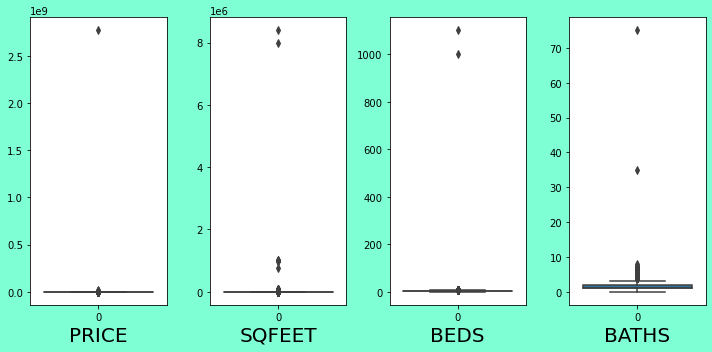

In [12]:
house_cont= house[['price','sqfeet','beds','baths']]

plt.figure(figsize=(10,5), facecolor='aquamarine')
plotnumber =1

for column in house_cont:
    if plotnumber<=4:
        ax=plt.subplot(1,4,plotnumber)
        sns.boxplot(house_cont[column])
        plt.xlabel(column.upper(), fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()
plt.show()

Bar plot can also shows the outliers present in Price, Sqfeet, Beds and Baths


Lets remove data of price, sqfeet, beds and baths which isn't less than 12.5% and more than 97.5%

In [13]:
qua_low = house.quantile(0.125)
qua_high = house.quantile(0.975)

h1= house[(house.price>qua_high.price)|
          (house.price<qua_low.price)|
          (house.sqfeet>qua_high.sqfeet)|
         (house.sqfeet<qua_low.sqfeet)|
         (house.beds>qua_high.beds)|
         (house.beds<qua_low.beds)|
         (house.baths>qua_high.baths)|
         (house.baths<qua_low.baths)].index

house.drop(h1, inplace=True)



Lets see the Disturbance plot and how values are distributed 

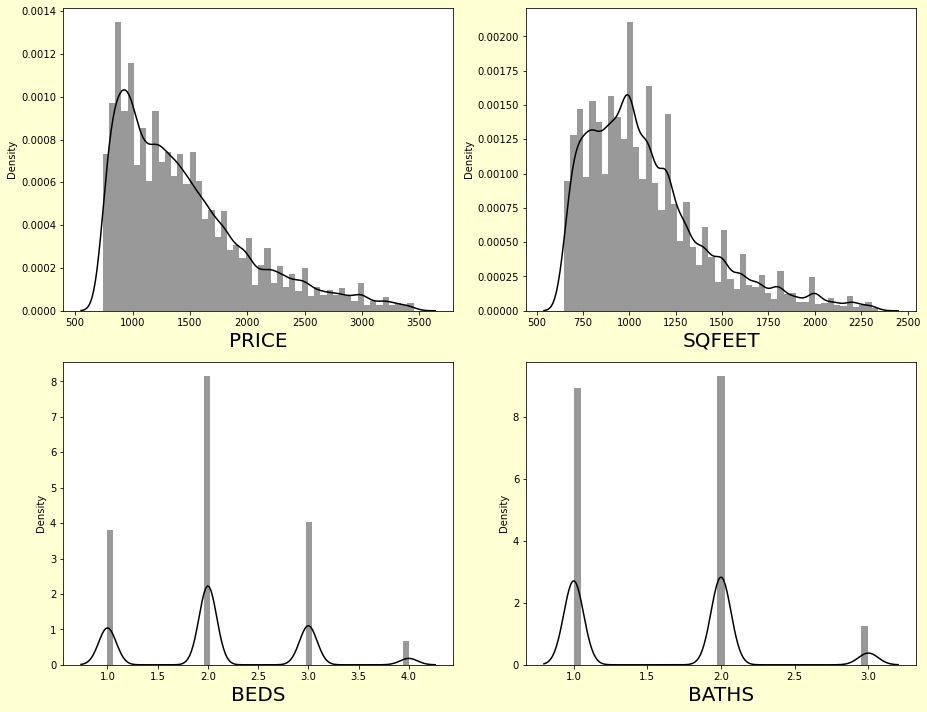

In [14]:
house_cont= house[['price','sqfeet','beds','baths']]

plt.figure(figsize=(13,10), facecolor='xkcd:eggshell')
plotnumber =1

for column in house_cont:
    if plotnumber<=10:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(house_cont[column], color='k')
        plt.xlabel(column.upper(), fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()
plt.show()

Using Heat map and Correlations 

Lets check the dependency of columns with each others 

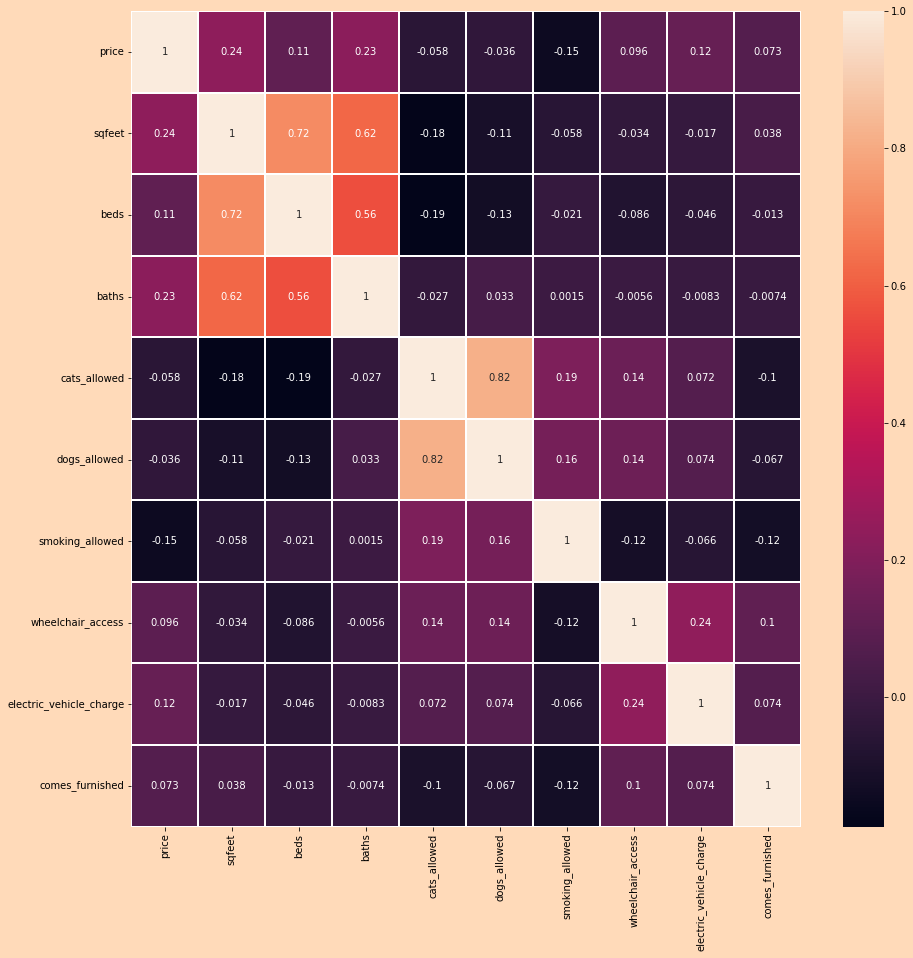

In [15]:
plt.figure(figsize=(15,15), facecolor='#ffdab9')
sns.heatmap(house.corr(), annot=True, linewidths=0.005);

Lets use get_dummies and convert object data to do further model application

In [16]:
house = pd.get_dummies(data=house)
house.shape

(58974, 363)

##### Iinitializing Linear Model  

In [17]:
lr = LinearRegression()

### Simple linear model

Lets check the result 

In [18]:
# Separating feature and output/result
X = house[['sqfeet']]
y = house[['price']]

# Splting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Fitting linear modle
lr.fit(X_train, y_train)


print('Intercept',lr.intercept_)
print('Coefficient ',lr.coef_)

Intercept [991.48092574]
Coefficient  [[0.40689659]]


Lets plot the scatter plot and see the predicted line

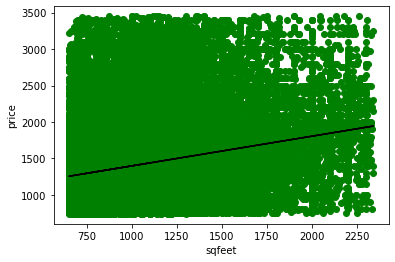

In [19]:
plt.scatter(X, y, color='g')
plt.plot(X_test, lr.predict(X_test), color ='k')
plt.xlabel('sqfeet')
plt.ylabel('price');

Lets see the MAE, MSE, RMSE and R2Score the view the model perfomance

In [20]:
# Predict the model
y_pred= lr.predict(X_test)

print('Mean Absolute Error',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score',r2_score(y_test, y_pred))

Mean Absolute Error 426.76385520718
Mean Squared Error 300213.8346956622
Root Mean Squared Error 547.9177262104797
R2 Score 0.055662803476350886


R2 score is very less, Lets do Multi Linear Regression and check R2 score 

### Multi Linear Regression 

In [21]:
# Sepearting Feature and result
X= house[['sqfeet','beds','baths']]
y = house[['price']]

# Spliting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Applying linear model to data
lr.fit(X_train, y_train)

print('Intercept',lr.intercept_)
print('Coefficient ',lr.coef_)

# Predict the model
y_pred= lr.predict(X_test)


print('Mean Absolute Error',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score',r2_score(y_test, y_pred))

Intercept [961.3255184]
Coefficient  [[   0.42499237 -114.16746469  154.85637623]]
Mean Absolute Error 421.019551527462
Mean Squared Error 293008.7912622138
Root Mean Squared Error 541.3028646351447
R2 score 0.07832661749968284


R2 score has not improved much, 

Lets make data scaler and apply Multi Regreesion model too

In [22]:
# Initialize Scaler Model
scaler = StandardScaler()

# Apply scaler model
X_scaled = scaler.fit_transform(X)

# Spliting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=200)

# Applying linear model to data
lr.fit(X_train, y_train)

print('Intercept',lr.intercept_)
print('Coefficient ',lr.coef_)

# Predict the model
y_pred= lr.predict(X_test)


print('Mean Absolute Error',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score',r2_score(y_test, y_pred))

Intercept [1437.43484598]
Coefficient  [[142.98260846 -92.13740545  90.10055812]]
Mean Absolute Error 418.1886532532226
Mean Squared Error 288534.5851372588
Root Mean Squared Error 537.1541539793384
R2 score 0.08115875324956545


R2 score has not improved much, 

Lets make data scaler and apply Decision Tree Regreesion model

## Decision Tree

In [23]:
# Sepearting Feature and result
X= house.drop(['price'], axis=1)
y = house[['price']]

# Apply scaler model
X_scaled = scaler.fit_transform(X)

# Spliting data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=100)

# Iinitializing Decision Tree
reg_tree = DecisionTreeRegressor(criterion= 'squared_error', max_depth= 3)

# Applying Decision Tree model to data
reg_tree.fit(X_train,y_train)

# Predict the model
y_pred = reg_tree.predict(X_test)


print('Mean Absolute Error',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score',r2_score(y_test, y_pred))

Mean Absolute Error 361.91216965499547
Mean Squared Error 224819.10073259717
Root Mean Squared Error 474.15092611171514
R2 score 0.31015164172673015


R2 score has improved very little, Lets do HyperParamete tuning and check best fit values to improve the R2

#####  Hyperparameter Tuning 

In [24]:
# parameter's
grid_param = {
    'criterion': ['squared_error','friedman_mse'],
    'max_depth' : range(20,22),            
    'min_samples_leaf' : range(12,18),
}

# Iinitializing Grid Search CV
grid_search = GridSearchCV(estimator=reg_tree,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1) 

#Applying Grid Search CV
grid_search.fit(X_train,y_train)

#Result
print('Grid Search Best Parameter',grid_search.best_params_)
print('Grid Search Best Score',grid_search.best_score_)

Grid Search Best Parameter {'criterion': 'squared_error', 'max_depth': 21, 'min_samples_leaf': 15}
Grid Search Best Score 0.6552152112092844


Applying Grid Search values to verify the result and check model score

In [25]:
# Iinitializing Decision Tree
reg_tree = DecisionTreeRegressor(criterion= 'squared_error', max_depth= 21, min_samples_leaf=15 )

# Applying Decision Tree model to data
reg_tree.fit(X_train,y_train)

# Predict the model
y_pred = reg_tree.predict(X_test)


print('Mean Absolute Error',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score',r2_score(y_test, y_pred))

Mean Absolute Error 234.4015763883326
Mean Squared Error 110268.52863392427
Root Mean Squared Error 332.06705442413926
R2 score 0.6616454598410717


R2 score improved very well and its better then the previous results